In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r"C:\Users\niran\OneDrive\Desktop\train (4).csv")

In [3]:
df_train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [4]:
df_train.dropna(inplace = True)

In [5]:
df_train.shape

(166821, 12)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
df_train.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [9]:
columns_to_encode = ['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category']
for column in columns_to_encode:
    df_train[column] = le.fit_transform(df_train[column])
    print((column,le.classes_))

('User_ID', array([1000001, 1000002, 1000003, ..., 1006038, 1006039, 1006040],
      dtype=int64))
('Product_ID', array(['P00000142', 'P00000242', 'P00000642', 'P00001042', 'P00001142',
       'P00001542', 'P00002142', 'P00002242', 'P00003442', 'P00004242',
       'P00004842', 'P00005542', 'P00005942', 'P00006942', 'P00008042',
       'P00010542', 'P00010742', 'P00010942', 'P00011942', 'P00012242',
       'P00014442', 'P00014642', 'P00014842', 'P00015542', 'P00015642',
       'P00015842', 'P00015942', 'P00016342', 'P00016442', 'P00016542',
       'P00016742', 'P00016842', 'P00019042', 'P00019342', 'P00021842',
       'P00023342', 'P00024142', 'P00025242', 'P00025342', 'P00025442',
       'P00026042', 'P00027842', 'P00028442', 'P00028542', 'P00029542',
       'P00030842', 'P00030942', 'P00031842', 'P00032042', 'P00034042',
       'P00034142', 'P00034242', 'P00034442', 'P00034742', 'P00035042',
       'P00035342', 'P00035542', 'P00035842', 'P00035942', 'P00036842',
       'P00037142', 'P

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int32  
 2   Gender                      166821 non-null  int32  
 3   Age                         166821 non-null  int32  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int32  
 6   Stay_In_Current_City_Years  166821 non-null  object 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 14.0+ MB


In [11]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '1', '4+', '0', '3'], dtype=object)

In [12]:
df_train['Stay_In_Current_City_Years'] = df_train['Stay_In_Current_City_Years'].replace('4+',' 4')

In [13]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '1', ' 4', '0', '3'], dtype=object)

In [14]:
df_train['Stay_In_Current_City_Years'].astype

<bound method NDFrame.astype of 1          2
6          2
13         1
14         1
16         1
          ..
545902     4
545904     2
545907     2
545908     2
545914     2
Name: Stay_In_Current_City_Years, Length: 166821, dtype: object>

In [15]:
df_train['Stay_In_Current_City_Years'] = df_train['Stay_In_Current_City_Years'].astype('int64')


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int32  
 2   Gender                      166821 non-null  int32  
 3   Age                         166821 non-null  int32  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int32  
 6   Stay_In_Current_City_Years  166821 non-null  int64  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int32(4), int64(6)
memory usage: 14.0 MB


In [17]:
df_train.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,2945.474341,231.841998,0.774645,2.455153,8.178886,1.087159,1.861690,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1684.776255,145.018965,0.417817,1.335119,6.487522,0.759824,1.284791,0.490470,2.573969,4.500288,4.125338,5082.287959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1470.000000,114.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,3007.000000,209.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,4351.000000,353.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,5869.000000,527.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


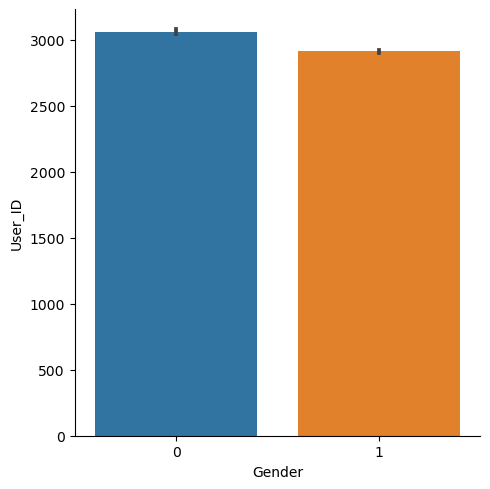

In [18]:
sns.catplot(data = df_train, x = 'Gender', y = 'User_ID', kind = 'bar')

<Axes: >

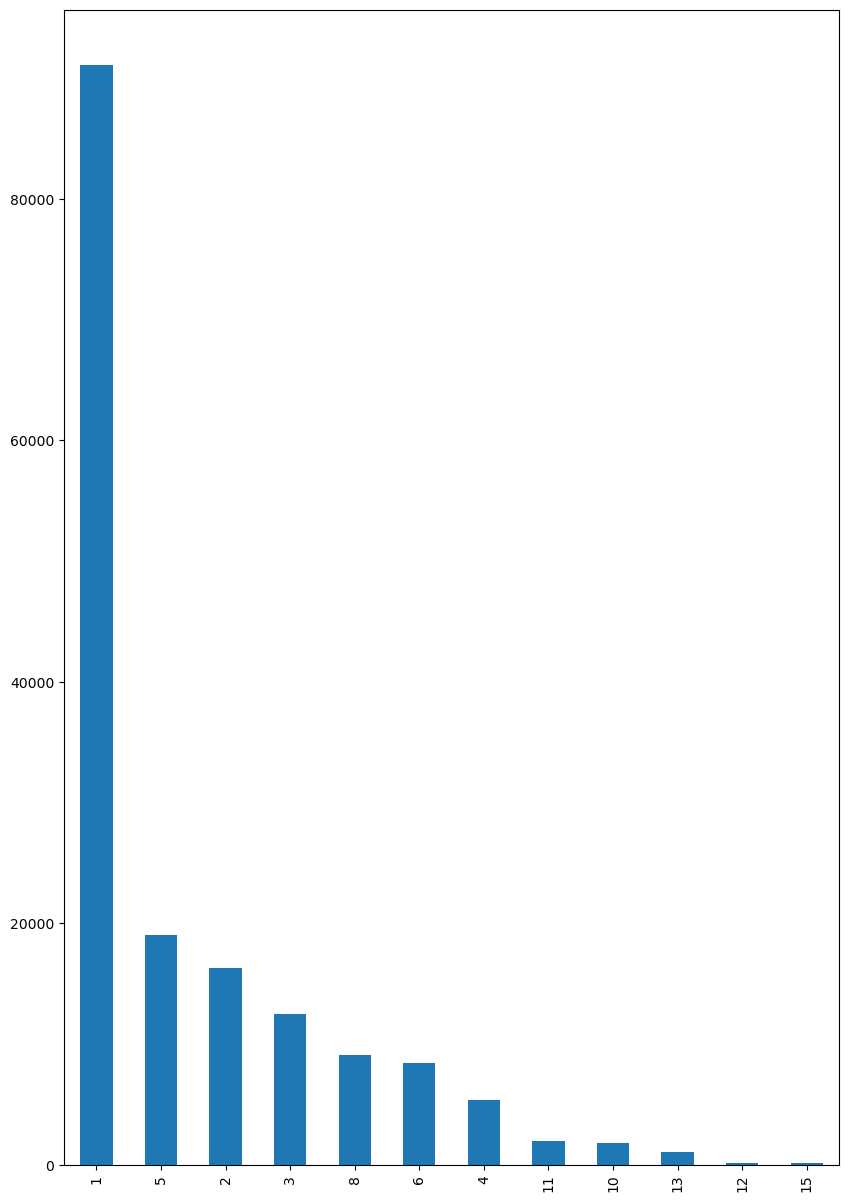

In [19]:
plt.figure(figsize = (10,15))
df_train['Product_Category_1'].value_counts().plot(kind = 'bar')

<Axes: >

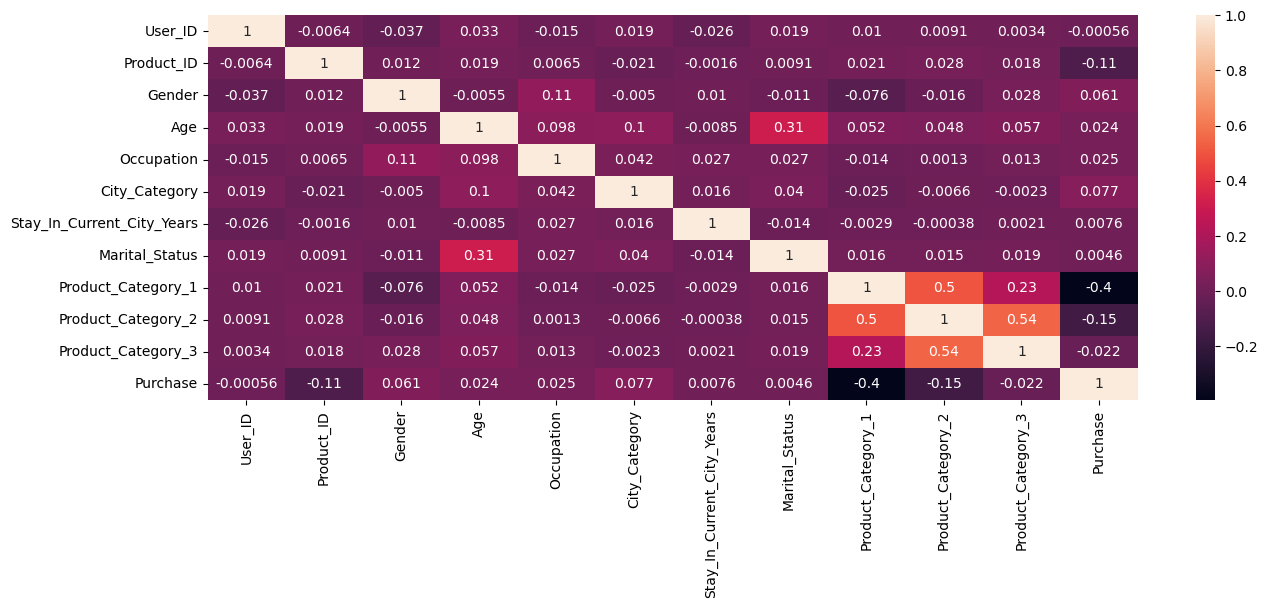

In [20]:
plt.figure(figsize = (15,5))
sns.heatmap(df_train.corr(), annot = True)

In [21]:
!pip install pandas-profiling


In [22]:
from pandas_profiling import ProfileReport


C:\Users\niran\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\niran\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
C:\Users\niran\AppData\Local\Temp\ipykernel_13772\3063248848.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import yda

In [23]:
!pip install pydantic-settings


  Obtaining dependency information for pydantic>=2.0.1 from https://files.pythonhosted.org/packages/42/28/f19be8d493c59a8ddf32c15d69765c6423ad712da1c6255b418df2fc1443/pydantic-2.6.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/84.0 kB ? eta -:--:--
     -------------- ------------------------- 30.7/84.0 kB 1.4 MB/s eta 0:00:01
     ----------------------------- ---------- 61.4/84.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 84.0/84.0 kB 793.0 kB/s eta 0:00:00
  Obtaining dependency information for pydantic-core==2.16.3 from https://files.pythonhosted.org/packages/2d/8a/6b16ba811d1b3499fa550a13913e0b053a15300d53fe1dd891e004c2dbd3/pydantic_core-2.16.3-cp311-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/394.9 kB ? eta -:--:--
   ------ --------------------------------- 61.4/394.9 kB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 112.6/394.9 kB 1.3 MB/s eta 0:00:01
   -------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\niran\\anaconda3\\Lib\\site-packages\\~-dantic\\annotated_types.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [24]:
pip install ydata-profiling 

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for pydantic<2,>=1.8.1 from https://files.pythonhosted.org/packages/18/9c/c84ead4e65e85dbb3b9806e8390db91b82993f5248fdfe9dacdd4da9c726/pydantic-1.10.14-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/151.6 kB ? eta -:--:--
     ------- ----------------------------- 30.7/151.6 kB 640.0 kB/s eta 0:00:01
     --------- --------------------------- 41.0/151.6 kB 487.6 kB/s eta 0:00:01
     ----------------- ------------------- 71.7/151.6 kB 653.6 kB/s eta 0:00:01
     ----------------- ------------------- 71.7/151.6 kB 653.6 kB/s eta 0:00:01
     ----------------- ------------------- 71.7/151.6 kB 653.6 kB/s eta 0:00:01
     ---------------------- -------------- 92.2/151.6 kB 401.6 kB/s eta 0:00:01
     ------------------------------------ 151.6/151.6 kB 565.3 kB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]==0.7.5 from htt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.
pydantic-settings 2.0.3 requires pydantic>=2.0.1, but you have pydantic 1.10.14 which is incompatible.


In [25]:
from ydata_profiling import ProfileReport

In [26]:
!conda install -c anaconda pandas-pandas_profiling

Retrieving notices: ...working... done
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /anaconda/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

In [27]:
pip install pandas-profiling

  Obtaining dependency information for visions[type_image_path]==0.7.4 from https://files.pythonhosted.org/packages/66/00/166b2beb8046f06b77a2bf2c1dafeb52eff608f7dd420c767d5f3ce36ef5/visions-0.7.4-py3-none-any.whl.metadata
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.5.1 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


In [28]:
from ydata_profiling import ProfileReport

In [29]:
profile=ProfileReport(df_train)
profile.to_file('data_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
new_data=df_train.loc[(df_train['Age']==1) & df_train['Gender']==1]

In [31]:
new_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
98,21,490,1,1,15,0,4,0,1,8.0,17.0,12099
103,21,405,1,1,15,0,4,0,1,11.0,16.0,12098
111,21,361,1,1,15,0,4,0,2,4.0,15.0,9564
127,24,335,1,1,4,2,4,0,1,5.0,9.0,15361
128,24,72,1,1,4,2,4,0,1,2.0,15.0,15770
...,...,...,...,...,...,...,...,...,...,...,...,...
545425,5793,52,1,1,5,1,1,0,1,14.0,16.0,15420
545427,5793,314,1,1,5,1,1,0,2,3.0,4.0,15973
545428,5793,249,1,1,5,1,1,0,2,15.0,16.0,6847
545430,5793,253,1,1,5,1,1,0,2,4.0,5.0,13276


In [32]:
sample_size=1000
sample=new_data.sample(sample_size,random_state=0)

In [33]:
sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
529454,3467,184,1,1,0,2,2,0,1,2.0,15.0,11599
6939,1068,242,1,1,6,0,4,0,5,6.0,13.0,5387
249217,2301,303,1,1,18,2,1,0,3,4.0,9.0,10833
118440,266,300,1,1,4,2,1,0,3,4.0,5.0,10649
93327,2273,501,1,1,4,2,1,1,11,15.0,16.0,3163
...,...,...,...,...,...,...,...,...,...,...,...,...
334055,3377,72,1,1,4,2,1,0,1,2.0,15.0,15659
156781,198,87,1,1,4,0,3,0,3,4.0,5.0,8284
121262,721,214,1,1,4,2,4,1,1,2.0,5.0,8263
490848,3510,120,1,1,1,1,2,1,6,8.0,14.0,16222


In [34]:
pos_mean=10000

In [35]:
sample_mean=sample['Purchase'].mean()

In [36]:
sample_mean

11806.467

In [37]:
from scipy.stats import ttest_1samp
t_stat, pvalue = ttest_1samp(sample['Purchase'], pos_mean)

In [38]:
print(t_stat,pvalue)

11.215158056527494 1.4097545140748985e-27
